<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [230]:
df = pd.read_csv('../data/states_edu.csv')
df.shape


(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [231]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [232]:
df['YEAR'].nunique()


33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [247]:
states = df.groupby('STATE').AVG_MATH_8_SCORE.mean()
print(states.loc['MICHIGAN'])
print(states.loc['OHIO'])
print("Ohio has a higher average outcome score across all years")

275.8181818181818
281.90909090909093
Ohio has a higher average outcome score across all years


Find the average for your outcome score across all states in 2019

In [248]:
df.loc[df['YEAR'] == 2019].groupby(['STATE', 'YEAR']).AVG_MATH_8_SCORE.mean().sum()/50

0.0

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [249]:
df.groupby('STATE').AVG_MATH_8_SCORE.max()


STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    266.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [250]:
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace = True)
df.dropna(subset=[ 'AVG_MATH_8_SCORE'], inplace = True)
df.dropna(subset=['ENROLL_ALL'], inplace = True)
df["EXP_PER_STUD"] = df["TOTAL_EXPENDITURE"]/df['ENROLL_ALL']

Final feature list: EXP_PER_STUD

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th Grade Math Scores')

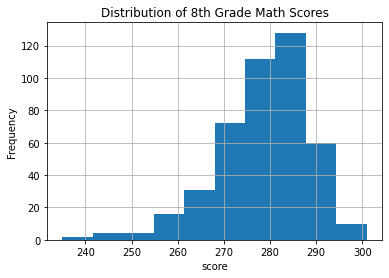

In [251]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th Grade Math Scores')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='EXP_PER_STUD', ylabel='AVG_MATH_8_SCORE'>

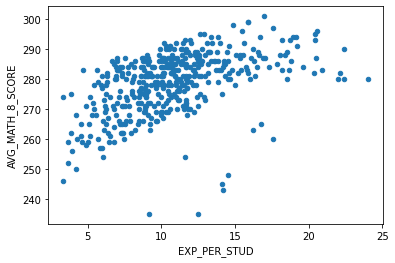

In [252]:
df.plot.scatter(x='EXP_PER_STUD', y='AVG_MATH_8_SCORE')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X = df[['ENROLL_ALL', 'ENROLL_8', 'YEAR', 'EXP_PER_STUD']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [256]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [257]:
# create your model here
model = LinearRegression()

In [258]:
model.fit(X_train, y_train)

LinearRegression()

In [259]:
y_pred = model.predict(X_test)

In [260]:
#skipped because I couldn't toubleshoot a compile error 
#FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
                         #cmap=plt.cm.Blues)
    

/Users/colterkorsmoe/Downloads/mdst_tutorials_W22/MDST-W22-Tutorial/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.34463858495814736

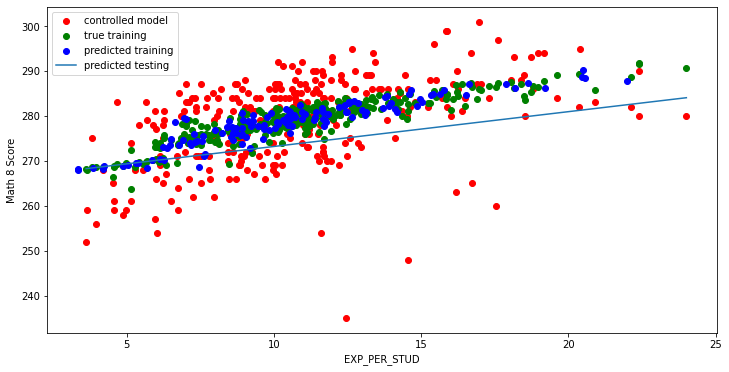

In [261]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'EXP_PER_STUD'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

model.score(X_test, y_test)

<h2> Summary </h2>

I compared 8th grade math scores against expenditure per student, which was not accurate at all, given the R^s value of 0.3446. Consequently, I conclude that there is not much correlation between expenditure per student and 8th grade math scores. I thought more spending per student would mean improved academic scores, but there are likely many confounding variables that I did not account for. 